In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import time
import sklearn
import scipy

In [2]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import StackingClassifier
from imblearn.over_sampling import SMOTE

In [3]:
from PlottingFunction import lda_1Dplot, plotModel, data_1Dplot
from Classification import model_fit, plot_confusion_matrix, model_fit2, plot_prob, get_precision_recall

In [4]:
from sklearn.preprocessing import StandardScaler

In [5]:
heart = pd.read_csv('FinalHeart.csv')
heart.drop(['Unnamed: 0'],axis=1,inplace=True)

heartPCA = pd.read_csv('PCAData.csv')
heartPCA.drop(['Unnamed: 0'],axis=1, inplace=True)
heartPCA['num'] = heart.num

heartICA = pd.read_csv('ICAData.csv')
heartICA.drop(['Unnamed: 0'],axis=1, inplace=True)
heartICA['num'] = heart.num

heartFactor = pd.read_csv('FactorData.csv')
heartFactor.drop(['Unnamed: 0'],axis=1, inplace=True)
heartFactor['num'] = heart.num

In [6]:
#fig, ax = plt.subplots(1,1,figsize=(12,8))
#sns.histplot(data = heart, x = 'num', ax = ax, color = 'cyan')
#ax.set_xlabel('Heart Disease', fontsize = 16)
#ax.set_ylabel('Frequency', fontsize = 16);

In [7]:
heart_num0 = heart.loc[heart.num==0,:].copy()
heart_num1 = heart.loc[heart.num==1,:].copy()
heart_num2 = heart.loc[heart.num==2,:].copy()
heart_num3 = heart.loc[heart.num==3,:].copy()
heart_num4 = heart.loc[heart.num==4,:].copy()

heartPCA_num0 = heartPCA.loc[heartPCA.num==0,:].copy()
heartPCA_num1 = heartPCA.loc[heartPCA.num==1,:].copy()
heartPCA_num2 = heartPCA.loc[heartPCA.num==2,:].copy()
heartPCA_num3 = heartPCA.loc[heartPCA.num==3,:].copy()
heartPCA_num4 = heartPCA.loc[heartPCA.num==4,:].copy()

heartICA_num0 = heartICA.loc[heartICA.num==0,:].copy()
heartICA_num1 = heartICA.loc[heartICA.num==1,:].copy()
heartICA_num2 = heartICA.loc[heartICA.num==2,:].copy()
heartICA_num3 = heartICA.loc[heartICA.num==3,:].copy()
heartICA_num4 = heartICA.loc[heartICA.num==4,:].copy()

heartF_num0 = heartFactor.loc[heartFactor.num==0,:].copy()
heartF_num1 = heartFactor.loc[heartFactor.num==1,:].copy()
heartF_num2 = heartFactor.loc[heartFactor.num==2,:].copy()
heartF_num3 = heartFactor.loc[heartFactor.num==3,:].copy()
heartF_num4 = heartFactor.loc[heartFactor.num==4,:].copy()

In [8]:
from sklearn.utils import resample

In [9]:
heart_num1 = resample(heart_num1, replace=True, n_samples=360, random_state = 144) 
heart_num2 = resample(heart_num2, replace=True, n_samples=360, random_state = 144) 
heart_num3 = resample(heart_num3, replace=True, n_samples=360, random_state = 144) 
heart_num4 = resample(heart_num4, replace=True, n_samples=360, random_state=144) 

heartPCA_num1 = resample(heartPCA_num1, replace=True, n_samples=360, random_state = 144) 
heartPCA_num2 = resample(heartPCA_num2, replace=True, n_samples=360, random_state = 144) 
heartPCA_num3 = resample(heartPCA_num3, replace=True, n_samples=360, random_state = 144) 
heartPCA_num4 = resample(heartPCA_num4, replace=True, n_samples=360, random_state=144) 

heartICA_num1 = resample(heartICA_num1, replace=True, n_samples=360, random_state = 144) 
heartICA_num2 = resample(heartICA_num2, replace=True, n_samples=360, random_state = 144) 
heartICA_num3 = resample(heartICA_num3, replace=True, n_samples=360, random_state = 144) 
heartICA_num4 = resample(heartICA_num4, replace=True, n_samples=360, random_state=144) 

heartF_num1 = resample(heartF_num1, replace=True, n_samples=360, random_state = 144) 
heartF_num2 = resample(heartF_num2, replace=True, n_samples=360, random_state = 144) 
heartF_num3 = resample(heartF_num3, replace=True, n_samples=360, random_state = 144) 
heartF_num4 = resample(heartF_num4, replace=True, n_samples=360, random_state = 144) 

In [10]:
print(heart_num0.shape[0])
print(heart_num1.shape[0])
print(heart_num2.shape[0])
print(heart_num3.shape[0])
print(heart_num4.shape[0])

360
360
360
360
360


In [11]:
heart_up    = pd.concat([heart_num0, heart_num1,heart_num2,heart_num3,heart_num4])
heartPCA_up = pd.concat([heartPCA_num0, heartPCA_num1, heartPCA_num2, heartPCA_num3, heartPCA_num4]) 
heartICA_up = pd.concat([heartICA_num0, heartICA_num1, heartICA_num2, heartICA_num3, heartICA_num4])
heartF_up   = pd.concat([heartF_num0, heartF_num1, heartF_num2, heartF_num3, heartF_num4])

In [12]:
X = heart_up.drop(['num'],axis=1).copy()
Y = heart_up.num.copy()

XPCA = heartPCA_up.drop(['num'],axis=1).copy()
YPCA = heartPCA_up.num.copy()

XICA = heartICA_up.drop(['num'],axis=1).copy()
YICA = heartICA_up.num.copy()

XFactor = heartF_up.drop(['num'],axis=1).copy()
YFactor = heartF_up.num.copy()

In [13]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size= 0.33, stratify=Y, shuffle=True)

In [14]:
SC = StandardScaler()
X_scaled = SC.fit_transform(X)

In [15]:
X_train_scaled, X_test_scaled, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.33, random_state=144, shuffle=True, stratify=Y)
X_train_PCA, X_test_PCA, Y_train_PCA, Y_test_PCA = train_test_split(XPCA, YPCA, test_size = 0.33, random_state=144, shuffle=True, stratify = Y)
X_train_ICA, X_test_ICA, Y_train_ICA, Y_test_ICA = train_test_split(XICA, YICA, test_size = 0.33, random_state=144, shuffle=True, stratify = Y)
X_train_F, X_test_F, Y_train_F, Y_test_F = train_test_split(XFactor, YFactor, test_size = 0.33, random_state=144, shuffle=True, stratify = Y)

In [16]:
glm = LogisticRegression(max_iter = 1e7)
model_fit2(glm, X_train, X_test, Y_train, Y_test)

LogisticRegression

Train score is :0.271
Test score is :0.185


In [17]:
glm = LogisticRegression(max_iter = 1e7)
model_fit2(glm, X_train_scaled, X_test_scaled, Y_train, Y_test)

LogisticRegression

Train score is :0.478
Test score is :0.455


In [18]:
rfc = RandomForestClassifier()
model_fit2(rfc, X_train_scaled, X_test_scaled, Y_train, Y_test)

RandomForestClassifier

Train score is :1.0
Test score is :0.943


In [19]:
glm = LogisticRegression(max_iter = 1e7)
model_fit2(glm, X_train_PCA, X_test_PCA, Y_train_PCA, Y_test_PCA)

LogisticRegression

Train score is :0.488
Test score is :0.473


In [20]:
glm = LogisticRegression(max_iter = 1e7)
model_fit2(glm, X_train_ICA, X_test_ICA, Y_train_ICA, Y_test_ICA)

LogisticRegression

Train score is :0.488
Test score is :0.47


In [21]:
glm = LogisticRegression(max_iter = 1e7)
model_fit2(glm, X_train_F, X_test_F, Y_train_F, Y_test_F)

LogisticRegression

Train score is :0.516
Test score is :0.495


In [22]:
rfc = RandomForestClassifier()
model_fit2(rfc, X_train_PCA, X_test_PCA, Y_train_PCA, Y_test_PCA)

RandomForestClassifier

Train score is :1.0
Test score is :0.949


In [23]:
rfc = RandomForestClassifier()
model_fit2(rfc, X_train_ICA, X_test_ICA, Y_train_ICA, Y_test_ICA)

RandomForestClassifier

Train score is :1.0
Test score is :0.933


In [24]:
rfc = RandomForestClassifier()
model_fit2(rfc, X_train_F, X_test_F, Y_train_F, Y_test_F)

RandomForestClassifier

Train score is :1.0
Test score is :0.943


In [25]:
X_original = heart.drop(['num'],axis=1).copy()
Y_original = heart.num.copy()
X_original_scaled = SC.fit_transform(X_original)

X_train_original, X_test_original, Y_train_original, Y_test_original = train_test_split(X_original_scaled, Y_original,
            test_size=0.33, random_state=144, shuffle=True, stratify = Y_original)

In [46]:
rfc = RandomForestClassifier(min_weight_fraction_leaf=0.05)
model_fit2(rfc, X_train_scaled, X_test_scaled, Y_train, Y_test)
rfc = RandomForestClassifier(min_weight_fraction_leaf=0.05)
rfc.fit(X_train_scaled,Y_train)
print(np.round(rfc.score(X_train_original, Y_train_original),2))
print(np.round(rfc.score(X_test_original, Y_test_original),2))

RandomForestClassifier

Train score is :0.73
Test score is :0.682
0.62
0.58


In [34]:
LDA = LinearDiscriminantAnalysis()
model_fit2(LDA, X_train_scaled, X_test_scaled, Y_train, Y_test)
LDA = LinearDiscriminantAnalysis()
LDA.fit(X_train_scaled,Y_train)
print(np.round(LDA.score(X_train_original, Y_train_original),2))
print(np.round(LDA.score(X_test_original, Y_test_original),2))

LinearDiscriminantAnalysis

Train score is :0.484
Test score is :0.478
0.44
0.46


In [47]:
QDA = QuadraticDiscriminantAnalysis()
QDA.set_params(reg_param = 0.4)
model_fit2(QDA, X_train_scaled, X_test_scaled, Y_train, Y_test)

QDA = QuadraticDiscriminantAnalysis()
QDA.set_params(reg_param = 0.4)
QDA.fit(X_train_scaled,Y_train)

print(np.round(QDA.score(X_train_original, Y_train_original),2))
print(np.round(QDA.score(X_test_original, Y_test_original),2))

QuadraticDiscriminantAnalysis

Train score is :0.652
Test score is :0.611
0.53
0.54


In [48]:
GNB = GaussianNB()
model_fit2(GNB, X_train_scaled, X_test_scaled, Y_train, Y_test)

GNB = GaussianNB()
GNB.fit(X_train_scaled,Y_train)

print(np.round(GNB.score(X_train_original, Y_train_original),2))
print(np.round(GNB.score(X_test_original, Y_test_original),2))

GaussianNB

Train score is :0.53
Test score is :0.497
0.44
0.44


In [73]:
gbc = GradientBoostingClassifier(n_estimators = 1000, min_weight_fraction_leaf=0.3)
model_fit2(gbc, X_train_scaled, X_test_scaled, Y_train, Y_test)
gbc = GradientBoostingClassifier(n_estimators = 1000, min_weight_fraction_leaf=0.3)
gbc.fit(X_train_scaled,Y_train)
print(np.round(gbc.score(X_train_original, Y_train_original),2))
print(np.round(gbc.score(X_test_original, Y_test_original),2))

GradientBoostingClassifier

Train score is :0.773
Test score is :0.741
0.53
0.54


In [90]:
xgb_cl = XGBClassifier(n_estimators = 1000, gamma = 10, max_depth = 4)
xgb_cl.set_params(random_state=144)
model_fit2(xgb_cl, X_train_scaled, X_test_scaled, Y_train, Y_test)
xgb_cl = XGBClassifier(n_estimators = 1000, gamma = 10, max_depth = 4)
xgb_cl.fit(X_train_scaled,Y_train)
print(np.round(xgb_cl.score(X_train_original, Y_train_original),2))
print(np.round(xgb_cl.score(X_test_original, Y_test_original),2))

XGBClassifier

Train score is :0.794
Test score is :0.732
0.6
0.55


In [91]:
oversample = SMOTE()

In [92]:
oversample.get_params()

{'k_neighbors': 5,
 'n_jobs': None,
 'random_state': None,
 'sampling_strategy': 'auto'}

In [93]:
X_temp, Y_temp = oversample.fit_resample(X_original, Y_original)

In [94]:
X_original.shape

(720, 13)

In [95]:
X_temp.shape

(1800, 13)

In [96]:
print(str(X_original.loc[Y_original==0,:].shape[0]) + " " + str(X_temp.loc[Y_temp==0,:].shape[0]))
print(str(X_original.loc[Y_original==1,:].shape[0]) + " " + str(X_temp.loc[Y_temp==1,:].shape[0]))
print(str(X_original.loc[Y_original==2,:].shape[0]) + " " + str(X_temp.loc[Y_temp==2,:].shape[0]))
print(str(X_original.loc[Y_original==3,:].shape[0]) + " " + str(X_temp.loc[Y_temp==3,:].shape[0]))
print(str(X_original.loc[Y_original==4,:].shape[0]) + " " + str(X_temp.loc[Y_temp==4,:].shape[0]))

360 360
209 360
68 360
65 360
18 360


In [97]:
X_train_temp, X_test_temp, Y_train_temp, Y_test_temp = train_test_split(X_temp, Y_temp, test_size=0.33, 
                                                                        random_state=144, shuffle=True, stratify=Y)

In [103]:
glm = LogisticRegression(max_iter = 1e7)
model_fit2(glm, X_train_temp, X_test_temp, Y_train_temp, Y_test_temp)

rfc = RandomForestClassifier()
model_fit2(rfc, X_train_temp, X_test_temp, Y_train_temp, Y_test_temp)

QDA = QuadraticDiscriminantAnalysis(reg_param = 0.4)
model_fit2(QDA, X_train_temp, X_test_temp, Y_train_temp, Y_test_temp)

gbc =  GradientBoostingClassifier()
model_fit2(gbc, X_train_temp, X_test_temp, Y_train_temp, Y_test_temp)

xgb_cl = XGBClassifier()
model_fit2(xgb_cl, X_train_temp, X_test_temp, Y_train_temp, Y_test_temp)

LogisticRegression

Train score is :0.529
Test score is :0.495
RandomForestClassifier

Train score is :1.0
Test score is :0.857
QuadraticDiscriminantAnalysis

Train score is :0.693
Test score is :0.626
GradientBoostingClassifier

Train score is :0.97
Test score is :0.8
XGBClassifier

Train score is :1.0
Test score is :0.828


In [104]:
X_train_original, X_test_original, Y_train_original, Y_test_original = train_test_split(X_original, Y_original,
            test_size=0.33, random_state=144, shuffle=True, stratify = Y_original)
print(rfc.score(X_train_original, Y_train_original))
print(rfc.score(X_test_original, Y_test_original))

0.9253112033195021
0.8991596638655462


In [105]:
print(glm.score(X_train_original, Y_train_original))
print(glm.score(X_test_original, Y_test_original))

0.5912863070539419
0.5630252100840336


In [106]:
print(QDA.score(X_train_original, Y_train_original))
print(QDA.score(X_test_original, Y_test_original))

0.6576763485477178
0.6386554621848739


In [107]:
print(gbc.score(X_train_original, Y_train_original))
print(gbc.score(X_test_original, Y_test_original))

0.8651452282157677
0.8529411764705882


In [108]:
print(xgb_cl.score(X_train_original, Y_train_original))
print(xgb_cl.score(X_test_original, Y_test_original))

0.9066390041493776
0.9117647058823529


RandomForestClassifier


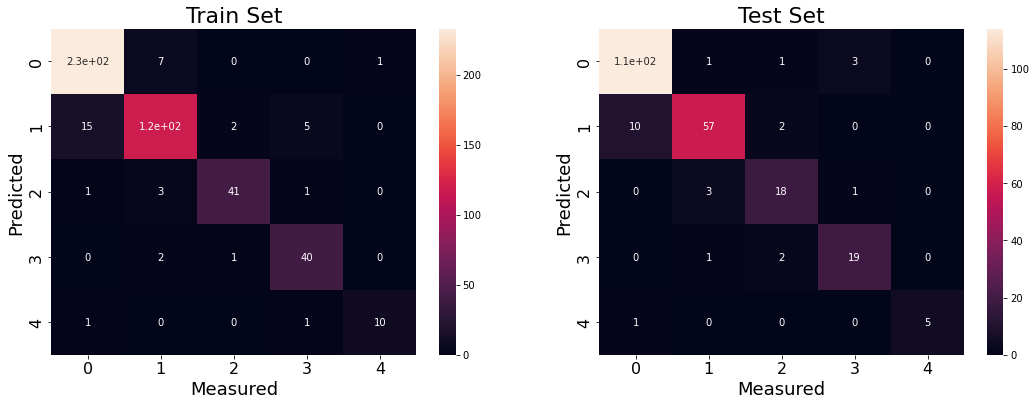

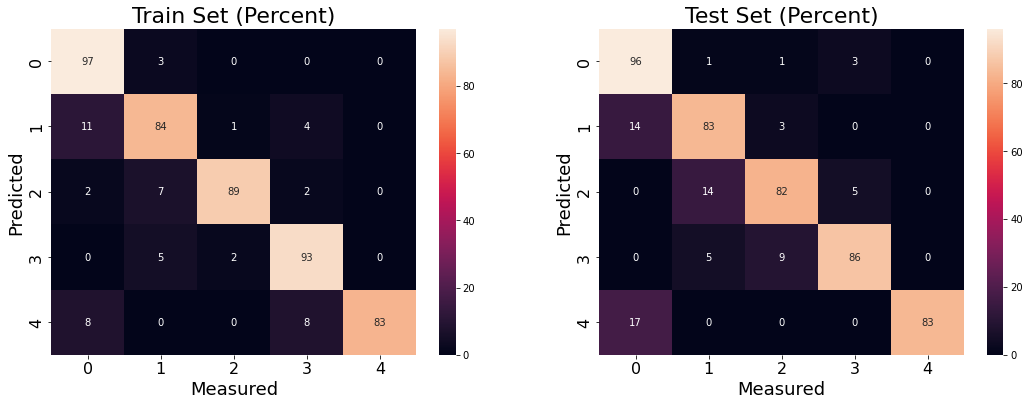

In [100]:
plot_confusion_matrix(rfc, X_train_original, X_test_original, Y_train_original, Y_test_original)

Precision score for training set is :0.93
Precision score for testing  set is :0.91
Recall score for training set is :0.97
Recall score for testing  set is :0.96
F1 score for training set is :0.95
F1 score for testing  set is :0.93
AUC for training set is :0.91
AUC for testing  set is :0.89


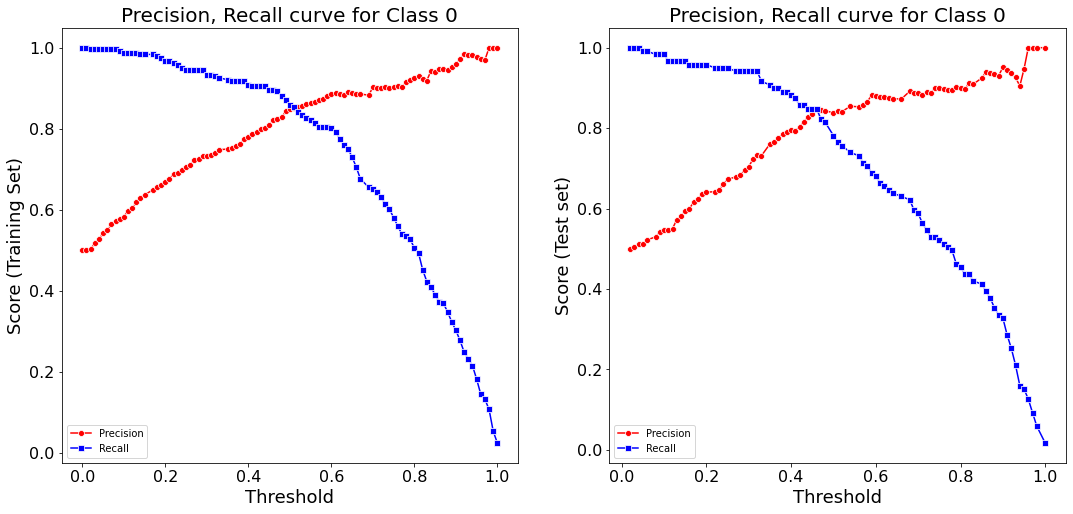

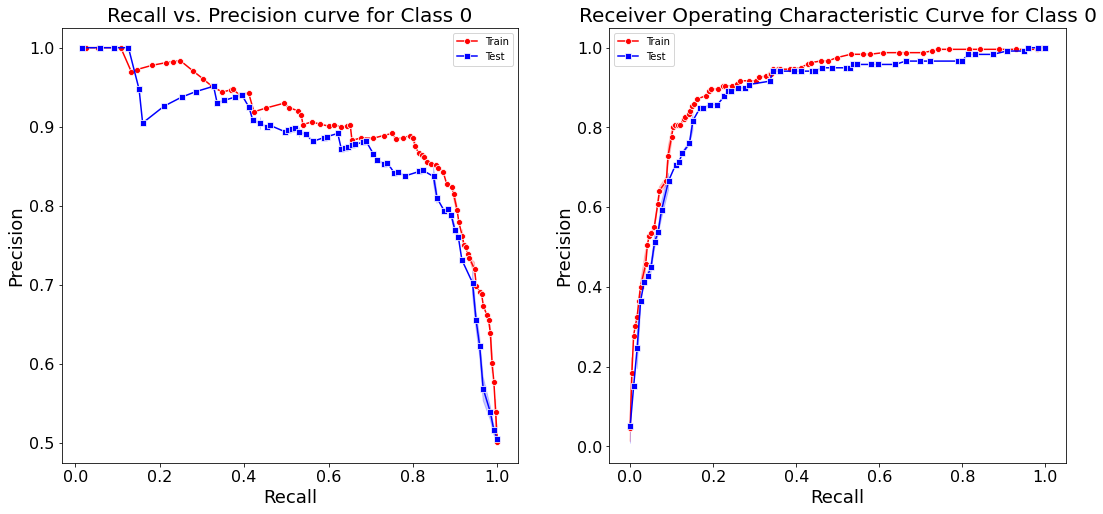

In [101]:
get_precision_recall(rfc, X_train_original, X_test_original, Y_train_original, Y_test_original, 0)

Precision score for training set is :0.91
Precision score for testing  set is :1.0
Recall score for training set is :0.83
Recall score for testing  set is :0.83
F1 score for training set is :0.87
F1 score for testing  set is :0.91
AUC for training set is :0.71
AUC for testing  set is :0.66


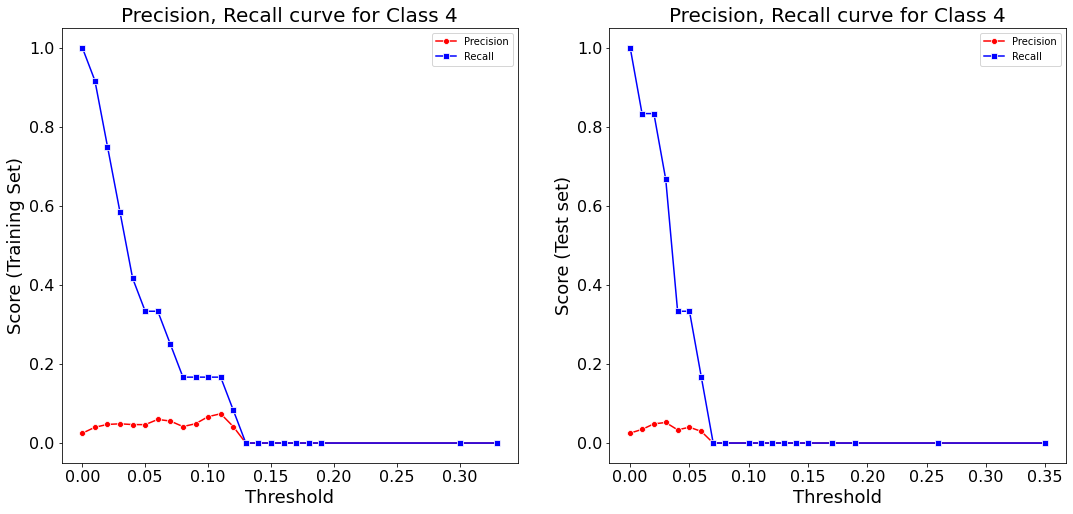

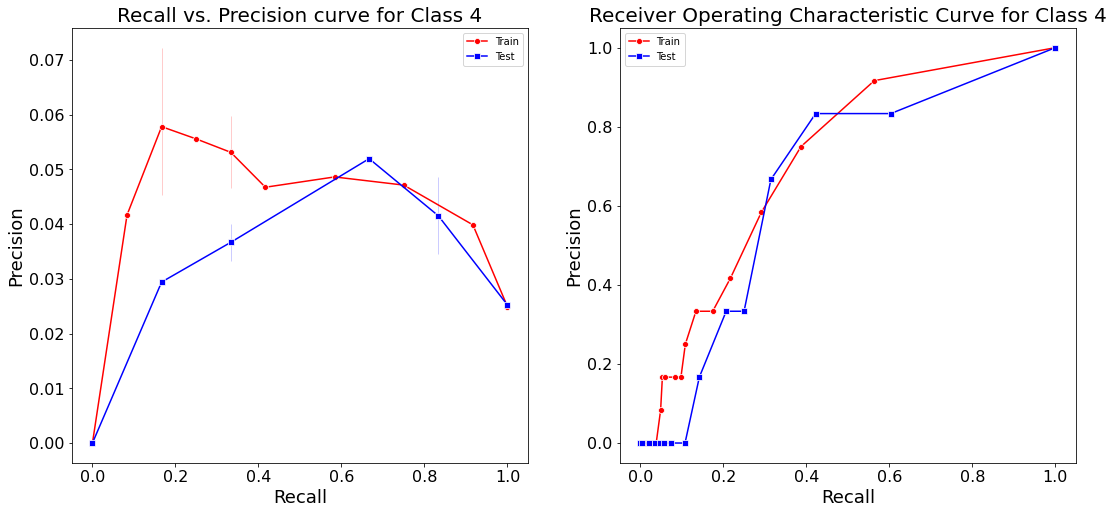

In [102]:
get_precision_recall(rfc, X_train_original, X_test_original, Y_train_original, Y_test_original, 4)

In [109]:
rfc.feature_names_in_

array(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
       'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal'], dtype=object)

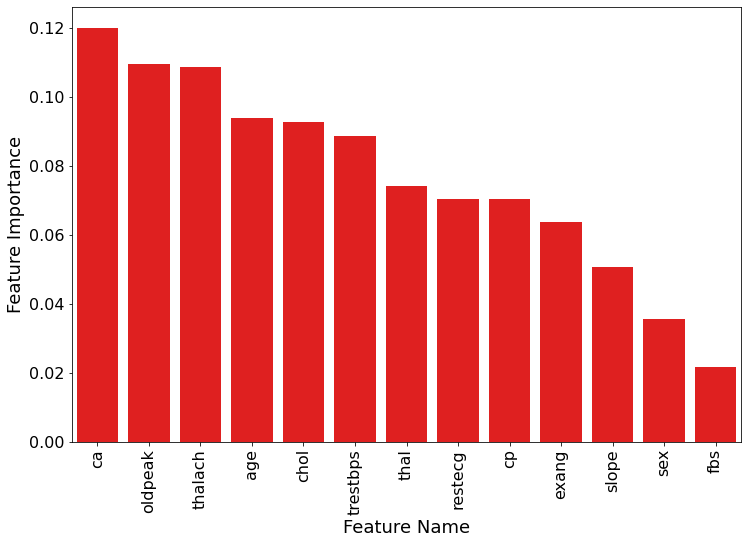

In [110]:
d = zip(list(rfc.feature_names_in_), list(rfc.feature_importances_))
d = sorted(d, key = lambda x:x[1], reverse=True)
df = pd.DataFrame(d)
df.columns = ['name','importance']

fig, axis = plt.subplots(1,1,figsize=(12,8))
sns.barplot(data = df, x = 'name', y = 'importance',color = 'red', ax = axis)
axis.set_xlabel('Feature Name', fontsize = 18)
axis.set_ylabel('Feature Importance', fontsize = 18);
axis.tick_params(axis='both', labelsize = 16)
axis.tick_params(axis='x', rotation = 90)

In [111]:
from sklearn.ensemble import StackingClassifier

In [112]:
rfc = RandomForestClassifier(random_state=144)
gbc = GradientBoostingClassifier(random_state=144)
xgb_cl = XGBClassifier(random_state=144)
#model_fit2(rfc, X_train_temp, X_test_temp, Y_train_temp, Y_test_temp)

In [113]:
estimators = [('rfc', rfc),
              ('gbc', gbc),
              ('xgb', glm)
             ]

In [114]:
clf = StackingClassifier(estimators=estimators, final_estimator=RandomForestClassifier(random_state=144), stack_method = 'predict_proba')
model_fit2(clf,  X_train_temp, X_test_temp, Y_train_temp, Y_test_temp)

StackingClassifier

Train score is :0.999
Test score is :0.855


In [115]:
print(clf.score(X_train_original, Y_train_original))
print(clf.score(X_test_original, Y_test_original))

0.9232365145228216
0.9201680672268907


In [116]:
clf = StackingClassifier(estimators=estimators, final_estimator=XGBClassifier(random_state=144), stack_method = 'predict_proba')
model_fit2(clf,  X_train_temp, X_test_temp, Y_train_temp, Y_test_temp)

StackingClassifier

Train score is :0.999
Test score is :0.857


In [117]:
print(clf.score(X_train_original, Y_train_original))
print(clf.score(X_test_original, Y_test_original))

0.9232365145228216
0.907563025210084
